# Solution R. Ugalde here

In [1]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()
client_id = os.environ.get("SPOTIPY_CLIENT_ID")
client_secret = os.environ.get("SPOTIPY_CLIENT_SECRET")


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

print(f"Client ID: {client_id}, Client Secret: {client_secret}")
                                                            

Client ID: 0fc0c0f47f394ed890bf5501fbc48bc6, Client Secret: 8c674905b81c48a0bfca4f16e58164d6


In [2]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

client_id = os.getenv("SPOTIPY_CLIENT_ID")
client_secret = os.getenv("SPOTIPY_CLIENT_SECRET")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Initialize Spotipy
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Test connection
try:
    result = sp.search(q="Coldplay", type="artist")
    print("Connected successfully! Found artist:", result['artists']['items'][0]['name'])
except Exception as e:
    print("Error:", e)


Connected successfully! Found artist: Coldplay


In [3]:
artist_id = "3TVXtAsR1Inumwj472S9r4"

try:
    response = sp.artist_top_tracks(artist_id)
    if response:
        # Extract the "tracks" object from the API response
        tracks = response["tracks"]

        # Select relevant data and convert duration from ms to minutes
        tracks = [{k: (v / (1000 * 60)) % 60 if k == "duration_ms" else v 
                   for k, v in track.items() 
                   if k in ["name", "popularity", "duration_ms"]} 
                  for track in tracks]
    else:
        print("No response from API.")
except Exception as e:
    print(f"Error fetching top tracks: {e}")


In [4]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=client_id, 
    client_secret=client_secret, 
    requests_timeout=30  # Increase timeout to 30 seconds
))


In [5]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(by="popularity", ascending=False, inplace=True)

print(tracks_df.head(3))


   duration_ms        name  popularity
0     4.017050       NOKIA          91
1     3.257183  DIE TRYING          88
2     2.899767   One Dance          87


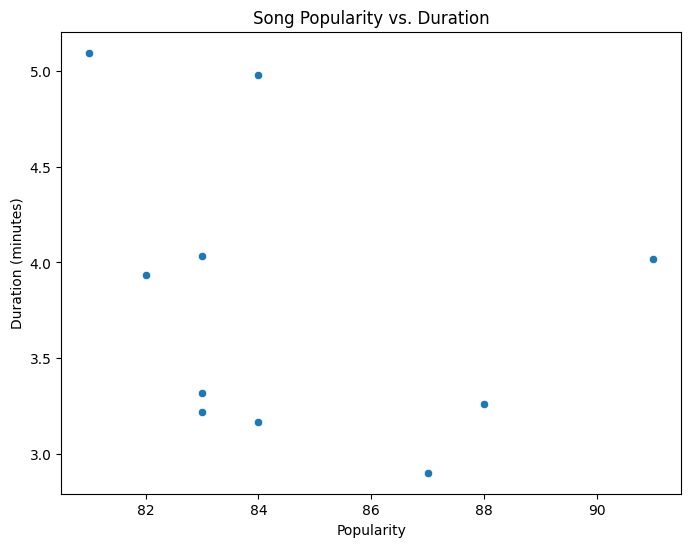

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))  # Set figure size
scatter_plot = sns.scatterplot(data=tracks_df, x="popularity", y="duration_ms")
scatter_plot.set_title("Song Popularity vs. Duration")
scatter_plot.set_xlabel("Popularity")
scatter_plot.set_ylabel("Duration (minutes)")

# Save the plot as an image
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")

plt.show()  # Show plot in interactive environments
